In [1]:
import pandas as pd
import matplotlib
import matplotlib.backends.backend_pdf as pdf
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Watermark is not required for this code, but is included for information. 
import watermark
%load_ext watermark
%watermark -a "ELEANOR LUTZ" -d -v -iv -m

pandas                          0.23.4
matplotlib                      3.0.3
watermark                       1.8.1
matplotlib.backends.backend_pdf 3.0.3
cartopy                         0.17.0
ELEANOR LUTZ 2019-06-20 

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores  : 12
interpreter: 64bit


In [2]:
def set_save_image(fig, savename, show=False):
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        try:
            ax.set_global()
            ax.background_patch.set_facecolor('none')
        except:
            pass 

    # Remove all padding and margins
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())

    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=1200, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")
    
    if show == True: 
        plt.show()
    plt.clf()
    plt.close('all')
    
def years_to_colors_mars(year): 
    # Colorcode the spaceships by decade
    # (This should really use a dictionary instead but it's late and this is fine)
    if year < 1980: 
        return '#af2d49'
    elif year < 2000:
        return '#a2a9b3'
    elif year < 2010: 
        return '#e2d9c0'
    elif year < 2020: 
        return '#63665b'

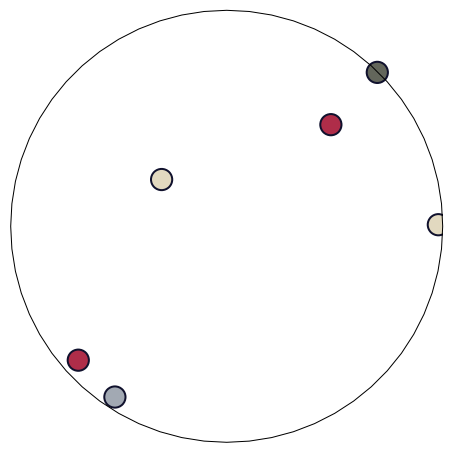

In [3]:
# Plot Mars in four different configurations for background in landing sites

size = 450
df = pd.read_csv("./data/mars_landings_wrangled.csv")
orthos = [[0, 90], [0, -90], [90, 0], [270, 0]]
show = True
for orth in orthos: 
    savename = './figures/mars_'+str(orth[0])+'_'+str(orth[1])+'.png'
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection=ccrs.Orthographic(*orth))
    ax.scatter(df['EW'], df['NS'], transform=ccrs.PlateCarree(), c=df['color'], s=size, lw=0)
    ax.scatter(df['EW'], df['NS'], transform=ccrs.PlateCarree(), c=df['color'], s=size, lw=0, alpha=0.5)
    ax.scatter(df['EW'], df['NS'], transform=ccrs.PlateCarree(), 
               facecolor="None", edgecolor="#10112d", alpha=1, s=size, lw=2)
    ax.set_global()
    if orth == orthos[1]:
        show = False
    set_save_image(fig, savename, show=show)
    
for orth in orthos: 
    savename = './figures/mars_'+str(orth[0])+'_'+str(orth[1])+'_shadow.png'
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection=ccrs.Orthographic(*orth))
    ax.scatter(df['EW'], df['NS'], transform=ccrs.PlateCarree(), c='#10112d', s=size, lw=0)
    ax.set_global()
    ax.outline_patch.set_edgecolor('none')
    set_save_image(fig, savename, show=False)

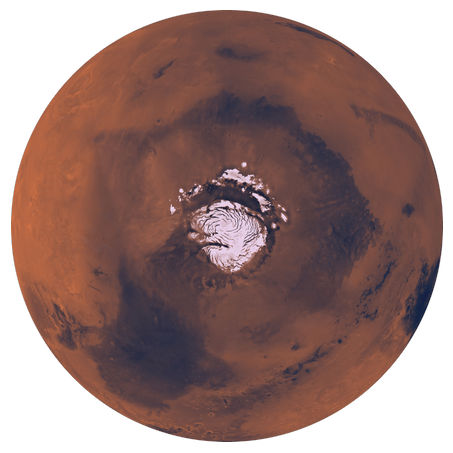

In [4]:
# Plot Mars in four different configurations for background in landing sites

orthos = [[0, 90], [0, -90], [90, 0], [270, 0]]
readname = "A:/ATLAS_OF_SPACE/DEMs/Mars_Viking.jpg"
img = plt.imread(readname)
show = True
for orth in orthos: 
    savename = './figures/mars_'+str(orth[0])+'_'+str(orth[1])+'_surface.png'
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes(projection=ccrs.Orthographic(*orth))
    ax.imshow(img, origin='upper', extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000)
    ax.set_global()
    ax.outline_patch.set_edgecolor('none')
    if orth == orthos[1]:
        show = False
    set_save_image(fig, savename, show=show)